In [1]:
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


\begin{figure}[h]
    \centering
    \includegraphics[width=0.25\textwidth]{A-lsm.png}
    \caption{A-lsm.png}
    \label{fig:A-lsm.png}
\end{figure}



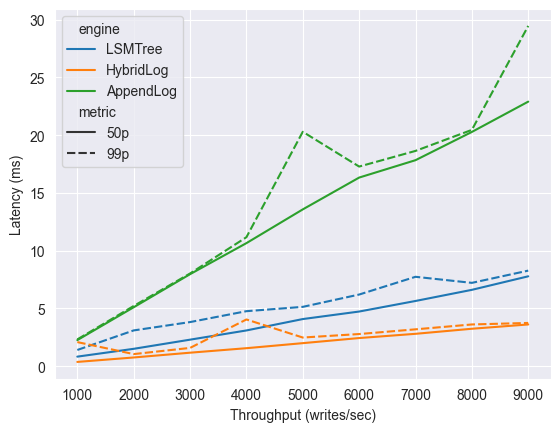

In [2]:
# throughput vs latency
df = run(
    [5], [5], [10_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [20],
        'density_factor': [10],
        'memtable_bytes_limit': [10_000_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [20],
        'mem_segment_len': [1_000_000],
        'ro_lag_interval': [100_000],
        'flush_interval': [100_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [20],
        'threshold': [10_000_000],
        'replica': [None]
    }],
    [measure_throughput_latency_writes], {'seconds': 10, 'writes_per_sec': list(range(1_000, 10_000, 1_000))}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '99p'])]
data['value'] = data['value'] * 1000

lineplot(data, 'writes_per_sec', 'value', 'A-lsm',
         hue='engine',
         style='metric',
         X='Throughput (writes/sec)', Y='Latency (ms)',
         save=False, show=False)

In [ ]:
# throughput vs latency
df = run(
    [5], [5], [10_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [10_000_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [1_000_000],
        'ro_lag_interval': [100_000],
        'flush_interval': [100_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [10_000_000],
        'replica': [None]
    }],
    [measure_snapshot], {}
)

data = df[['metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '99p'])]
data['value'] = data['value'] * 1000

lineplot(data, 'writes_per_sec', 'value', 'A-lsm',
         hue='engine',
         style='metric',
         X='Throughput (writes/sec)', Y='Latency (ms)',
         save=False, show=True)